## Import Necessary Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
#  SVC means support vector classification
# When working with SVC  we can specify what kernel we want to use
# If we are using a poly kernel, we can specify what degree of poly we want
from sklearn.svm import SVC
from sklearn import datasets

In [3]:
iris = datasets.load_iris()
X = iris['data'][:, (2,3)] # petal length, petal width
y = iris['target']
# print(X.shape)
# print(iris['target'][iris['target'] == 1].shape)

setosa_or_versicolor = (y == 0) | (y == 1)
# print(X[setosa_or_versicolor].shape)
X = X[setosa_or_versicolor]
y = y[setosa_or_versicolor]
# print(X[:,1])

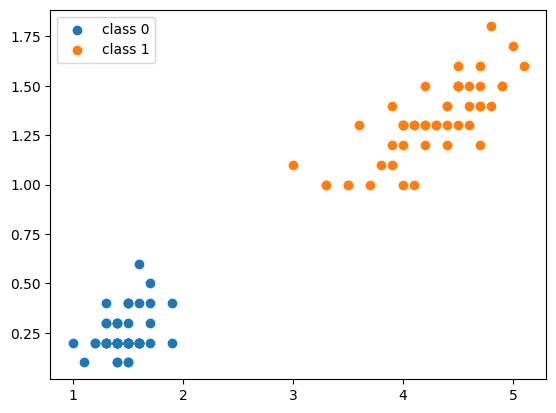

In [4]:
plt.scatter(X[:,0][y == 0], X[:,1][y == 0], label='class 0')
plt.scatter(X[:,0][y == 1], X[:,1][y == 1], label='class 1')
plt.legend()
plt.show()

## SVM Classifier model
#### We use the linear kernel because we are able to see from our plot above that we can draw the linear line effectively

In [5]:
svm_clf = SVC(kernel='linear', C=float(100000)) # max c --> Hard Classifier
svm_clf.fit(X, y)

SVC(C=100000.0, kernel='linear')

In [6]:
#  This is the w0 and w2 of our SVM Line
svm_clf.coef_ # weight terms

array([[1.29411744, 0.82352928]])

In [7]:
#  This is the C term of the w0 term of our hyperplane line
svm_clf.intercept_ # bias term

array([-3.78823471])

In [8]:
def plot_svc_decision_boundary(svm_clf, xmin, xmax):
    w = svm_clf.coef_[0]
    b = svm_clf.intercept_[0]

    # At the decision boundary, w0*x0 + w1*x1 + b = 0
    #  => x1 = -w0/w1 * x0 - b/w1
    x0 = np.linspace(xmin, xmax, 200)
    decision_boundary = -w[0]/w[1] * x0 - b/w[1]

    margin = 1/w[1]
    gutter_up = decision_boundary + margin
    gutter_down = decision_boundary - margin

    svs = svm_clf.support_vectors_
    plt.scatter(svs[:, 0], svs[:, 1], s=100, facecolors='#FFAAAA', label='Support Vectors') # Highlight Support Vectors
    plt.plot(x0, decision_boundary, 'k-', linewidth=2, label='Hyperplane')
    plt.plot(x0, gutter_up, 'k--', linewidth=2)
    plt.plot(x0, gutter_down, 'k--', linewidth=2)

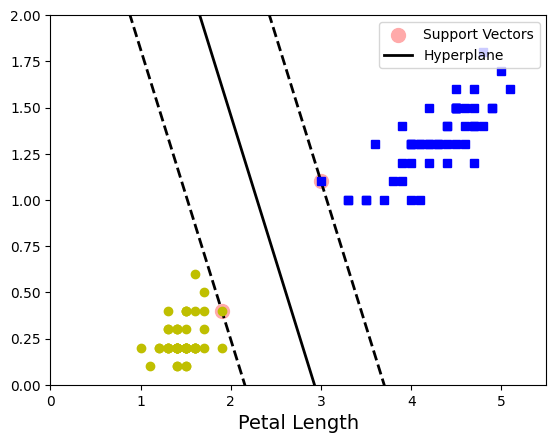

In [9]:
plot_svc_decision_boundary(svm_clf, 0, 5.5)
plt.plot(X[:,0][y == 1], X[:,1][y == 1], 'bs')
plt.plot(X[:,0][y == 0], X[:,1][y == 0], 'yo')
plt.xlabel('Petal Length', fontsize=14)
plt.axis([0, 5.5, 0, 2])
plt.legend()
plt.show()

### The solid line in the middle of the graph is called our hyperplane
### The two dotted lines that are like a margin for the hyperplane are actually called as support vectors
### The dotted lines refer to our gutter up adn gutter down


## To access the support vector, we make use of the attribute

#### This is going to tell us where exactly our support vectrs are present

In [10]:
svm_clf.support_vectors_

array([[1.9, 0.4],
       [3. , 1.1]])

#### When we are working with this support vector machine, it is very importnt that we scale the data first
#### If we donot scale the data, we will not be able to get a better fit of our svm model

## Why Scaling is important

#### Below is am example to show that

(0.0, 6.0, 0.0, 90.0)

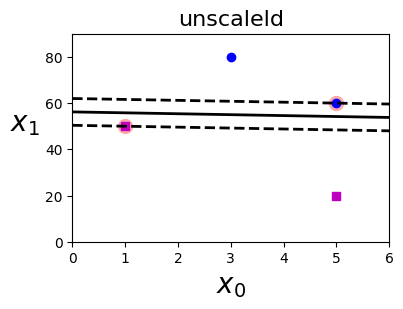

In [11]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])
svm_clf = SVC(kernel='linear', C=100)
svm_clf.fit(Xs, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(121)
plt.plot(Xs[:, 0][ys == 1], Xs[:, 1][ys == 1], 'bo')
plt.plot(Xs[:, 0][ys == 0], Xs[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_clf, 0, 6)
plt.xlabel('$x_0$', fontsize=20)
plt.ylabel('$x_1$    ', fontsize=20, rotation=0)
plt.title('unscaleld', fontsize=16)
plt.axis([0, 6, 0, 90])

In [12]:
Xs

array([[ 1., 50.],
       [ 5., 20.],
       [ 3., 80.],
       [ 5., 60.]])

## Scaled Version

(-2.0, 2.0, -2.0, 2.0)

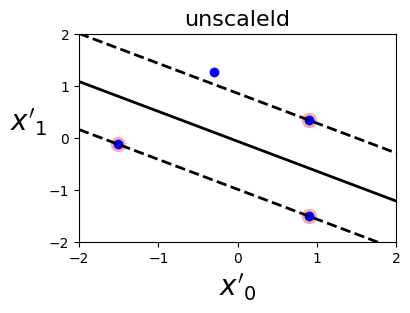

In [13]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
x_scaled = scaler.fit_transform(Xs)
svm_clf.fit(x_scaled, ys)

plt.figure(figsize=(9, 2.7))
plt.subplot(122)
plt.plot(x_scaled[:, 0][ys == 1], x_scaled[:, 1][ys == 1], 'bo')
plt.plot(x_scaled[:, 0][ys == 0], x_scaled[:, 1][ys == 0], 'bo')
plot_svc_decision_boundary(svm_clf, -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$    ", fontsize=20, rotation=0)
plt.title('unscaleld', fontsize=16)
plt.axis([-2, 2, -2, 2])

## Non Linear Classifier

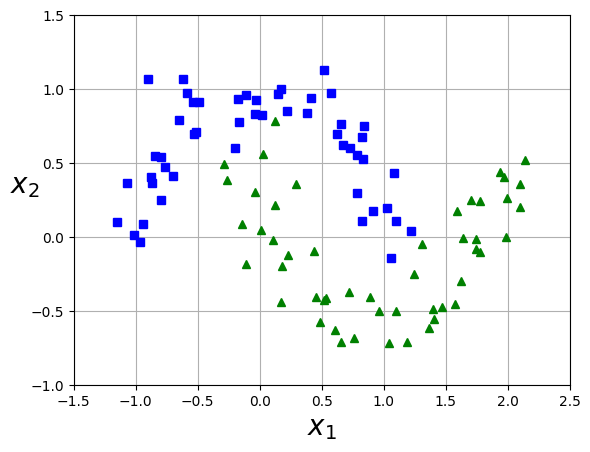

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100,noise=0.15, random_state=60)

def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

### Introducing Pipeline

In [15]:
Xs = np.array([[1, 50], [5, 20], [3, 80], [5, 60]]).astype(np.float64)
ys = np.array([0, 0, 1, 1])

In [16]:
from sklearn.pipeline import Pipeline

In [17]:
svm_pipe = Pipeline([('scaler', StandardScaler()),
                    ('svm_clf_pipe', SVC(kernel='linear', C=100))])

In [18]:
svm_pipe.fit(Xs, ys)

Pipeline(steps=[('scaler', StandardScaler()),
                ('svm_clf_pipe', SVC(C=100, kernel='linear'))])

### Accessing Individul Model

In [19]:
svm_pipe['svm_clf_pipe']

SVC(C=100, kernel='linear')

Text(0.5, 1.0, 'Scaled')

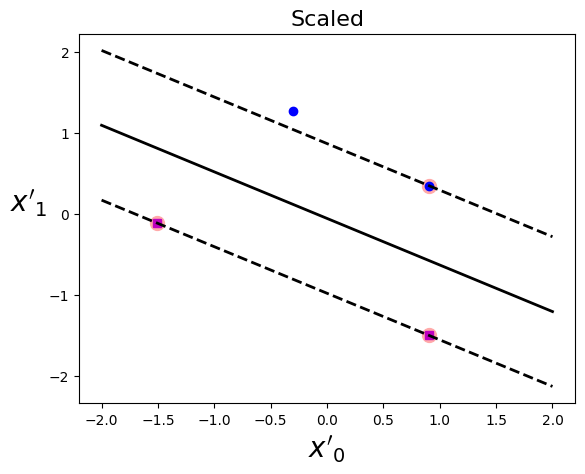

In [20]:
plt.plot(x_scaled[:, 0][ys == 1], x_scaled[:, 1][ys == 1], 'bo')
plt.plot(x_scaled[:, 0][ys == 0], x_scaled[:, 1][ys == 0], 'ms')
plot_svc_decision_boundary(svm_pipe['svm_clf_pipe'], -2, 2)
plt.xlabel("$x'_0$", fontsize=20)
plt.ylabel("$x'_1$    ", fontsize=20, rotation=0)
plt.title('Scaled', fontsize=16)

## Polynomial Features

In [21]:
from sklearn.preprocessing import PolynomialFeatures

In [22]:
x = np.arange(1,4).reshape(-1, 1)

In [23]:
pf = PolynomialFeatures(degree=2)

In [24]:
pf.fit_transform(x) # first is bias term, remaining columns are Weight terms (x, x**2) as degree = 2

array([[1., 1., 1.],
       [1., 2., 4.],
       [1., 3., 9.]])

In [25]:
pf = PolynomialFeatures(degree=3) #degree 3
pf.fit_transform(x)

array([[ 1.,  1.,  1.,  1.],
       [ 1.,  2.,  4.,  8.],
       [ 1.,  3.,  9., 27.]])

## Bring Back non-linear classifier data

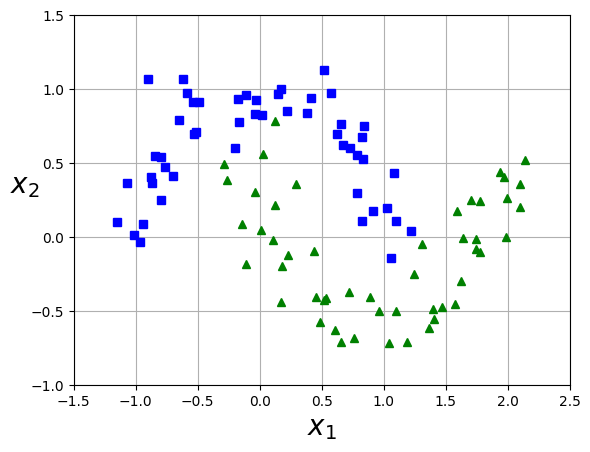

In [26]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=100, noise=0.15, random_state=60)
def plot_datasets(X, y, axes):
    plt.plot(X[:, 0][y == 0], X[:, 1][y == 0], 'bs')
    plt.plot(X[:, 0][y == 1], X[:, 1][y == 1], 'g^')
    plt.axis(axes)
    plt.grid(True, which='both')
    plt.xlabel(r"$x_1$", fontsize=20)
    plt.ylabel(r"$x_2$", fontsize=20, rotation=0)

plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()

## SkLearn Pipeline
#### This Pipeline helps us to combine multiple operations in a single call
#### With the below Pipeline, we have performed our polynomail features, scaling and binomial classification
#### When we perform the fit operation, it is going to perform all the previous operations on our X and perform the fit on our y

In [40]:
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import PolynomialFeatures
from sklearn.svm import LinearSVC

polynomial_svm_cf = Pipeline([
    ('poly_features', PolynomialFeatures(degree=3)),
    ('scaler', StandardScaler()),
    ('svm_clf', LinearSVC(dual=True, C=10, loss='hinge', random_state=42, max_iter=1750))
])

polynomial_svm_cf.fit(X, y)

Pipeline(steps=[('poly_features', PolynomialFeatures(degree=3)),
                ('scaler', StandardScaler()),
                ('svm_clf',
                 LinearSVC(C=10, dual=True, loss='hinge', max_iter=1750,
                           random_state=42))])

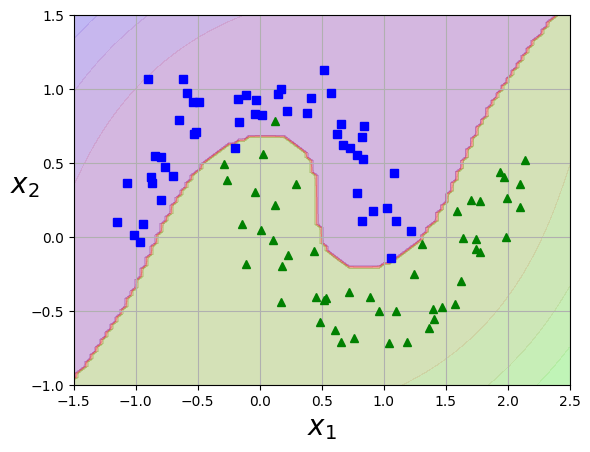

In [41]:
def plot_predictions(clf, axes):
    x0s = np.linspace(axes[0], axes[1], 100)
    x1s = np.linspace(axes[2], axes[3], 100)
    x0, x1 = np.meshgrid(x0s, x1s)
    X = np.c_[x0.ravel(), x1.ravel()]
    y_pred = clf.predict(X).reshape(x0.shape)
    y_decision = clf.decision_function(X).reshape(x0.shape)
    plt.contourf(x0, x1, y_pred, cmap=plt.cm.brg, alpha=0.2)
    plt.contourf(x0, x1, y_decision, cmap=plt.cm.brg, alpha=0.1)

plot_predictions(polynomial_svm_cf, [-1.5, 2.5, -1, 1.5])
plot_datasets(X, y, [-1.5, 2.5, -1, 1.5])
plt.show()